In [36]:
import pandas as pd

In [37]:
df=pd.read_excel("C:\\Users\\engr-\\Downloads\\Sample - Superstore.xls")

In [38]:
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [39]:
print(df.shape)

(9994, 21)


In [40]:
print(df.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


In [41]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [42]:
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


## The EDA steps show that dataset is clean and ready for visualization; No missing values or outliers; uniformly distributed columns

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

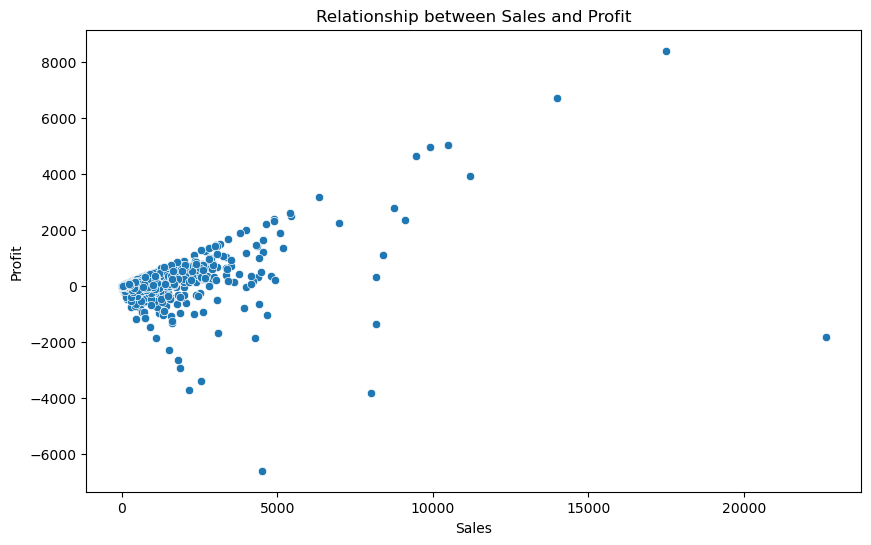

In [44]:
# Relationship between sales and profit
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Relationship between Sales and Profit')
plt.show()

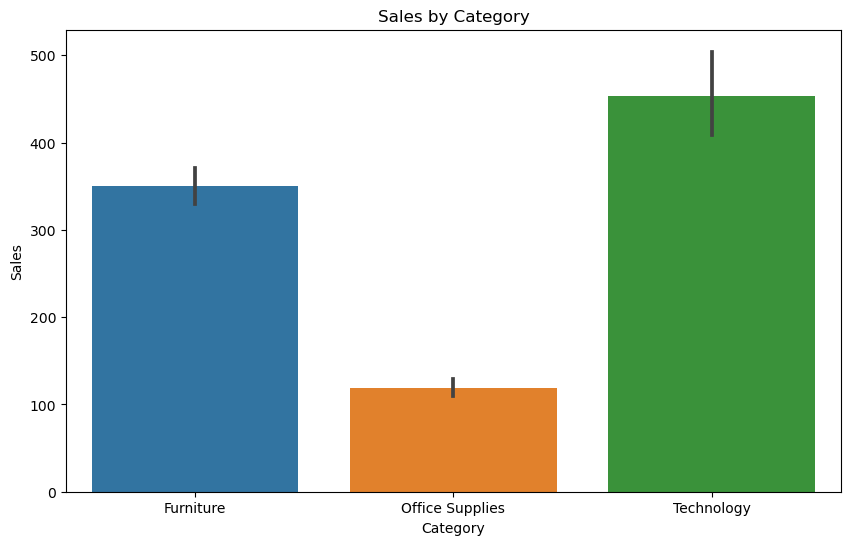

In [12]:
# Sales by category
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

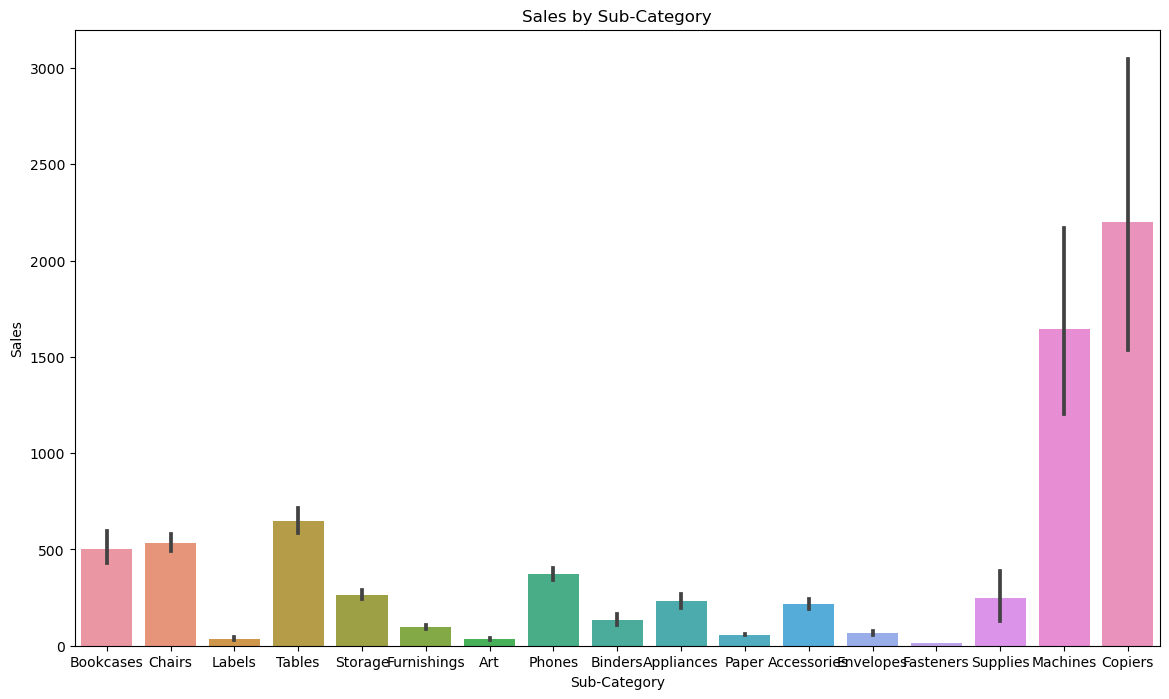

In [45]:
# Sales by sub-category
plt.figure(figsize=(14,8))
sns.barplot(x='Sub-Category', y='Sales', data=df)
plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.show()

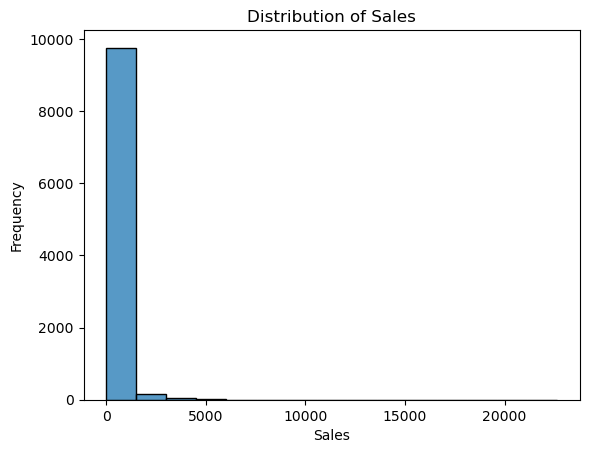

In [46]:
#histogram of sales
sns.histplot(df['Sales'], bins=15)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

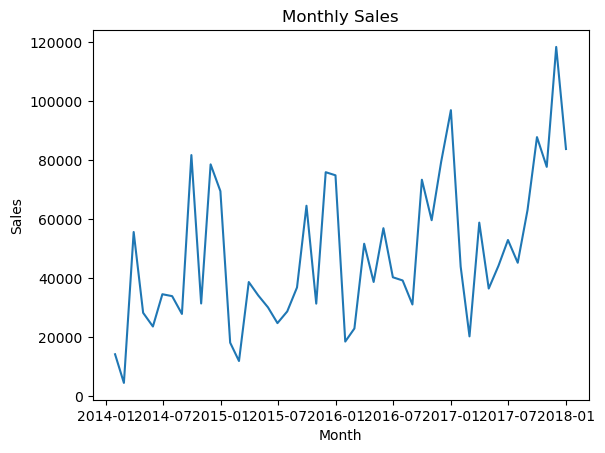

In [47]:
#Line chart of Sales over time
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()

plt.plot(monthly_sales)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

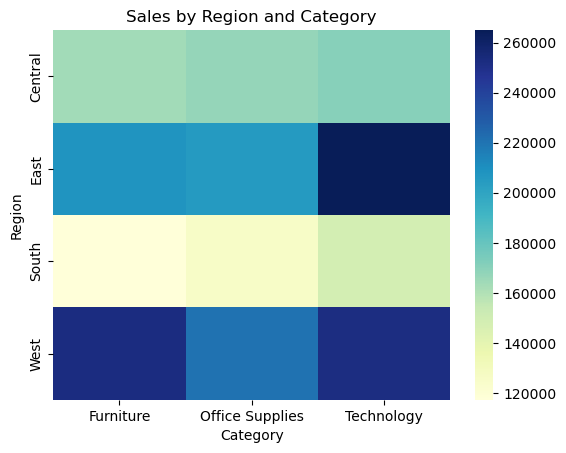

In [48]:
#Heat map of sales by region and product category
pivot_table = pd.pivot_table(df, values='Sales', index='Region', columns='Category', aggfunc='sum')

sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Sales by Region and Category')
plt.show()

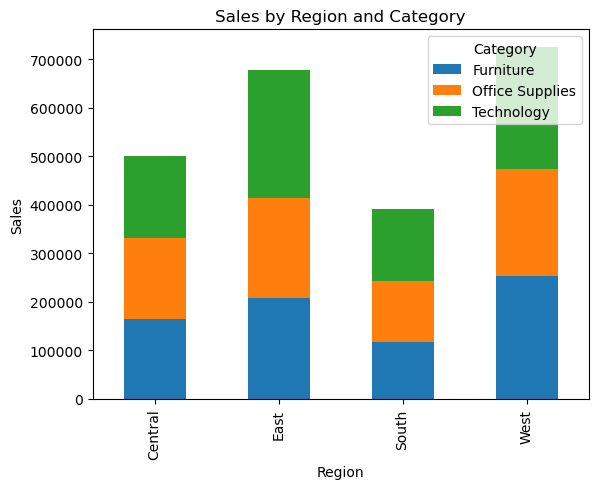

In [49]:
#Stacked bar chart of sales by region and product category
pivot_table = pd.pivot_table(df, values='Sales', index='Region', columns='Category', aggfunc='sum')

pivot_table.plot(kind='bar', stacked=True)
plt.title('Sales by Region and Category')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

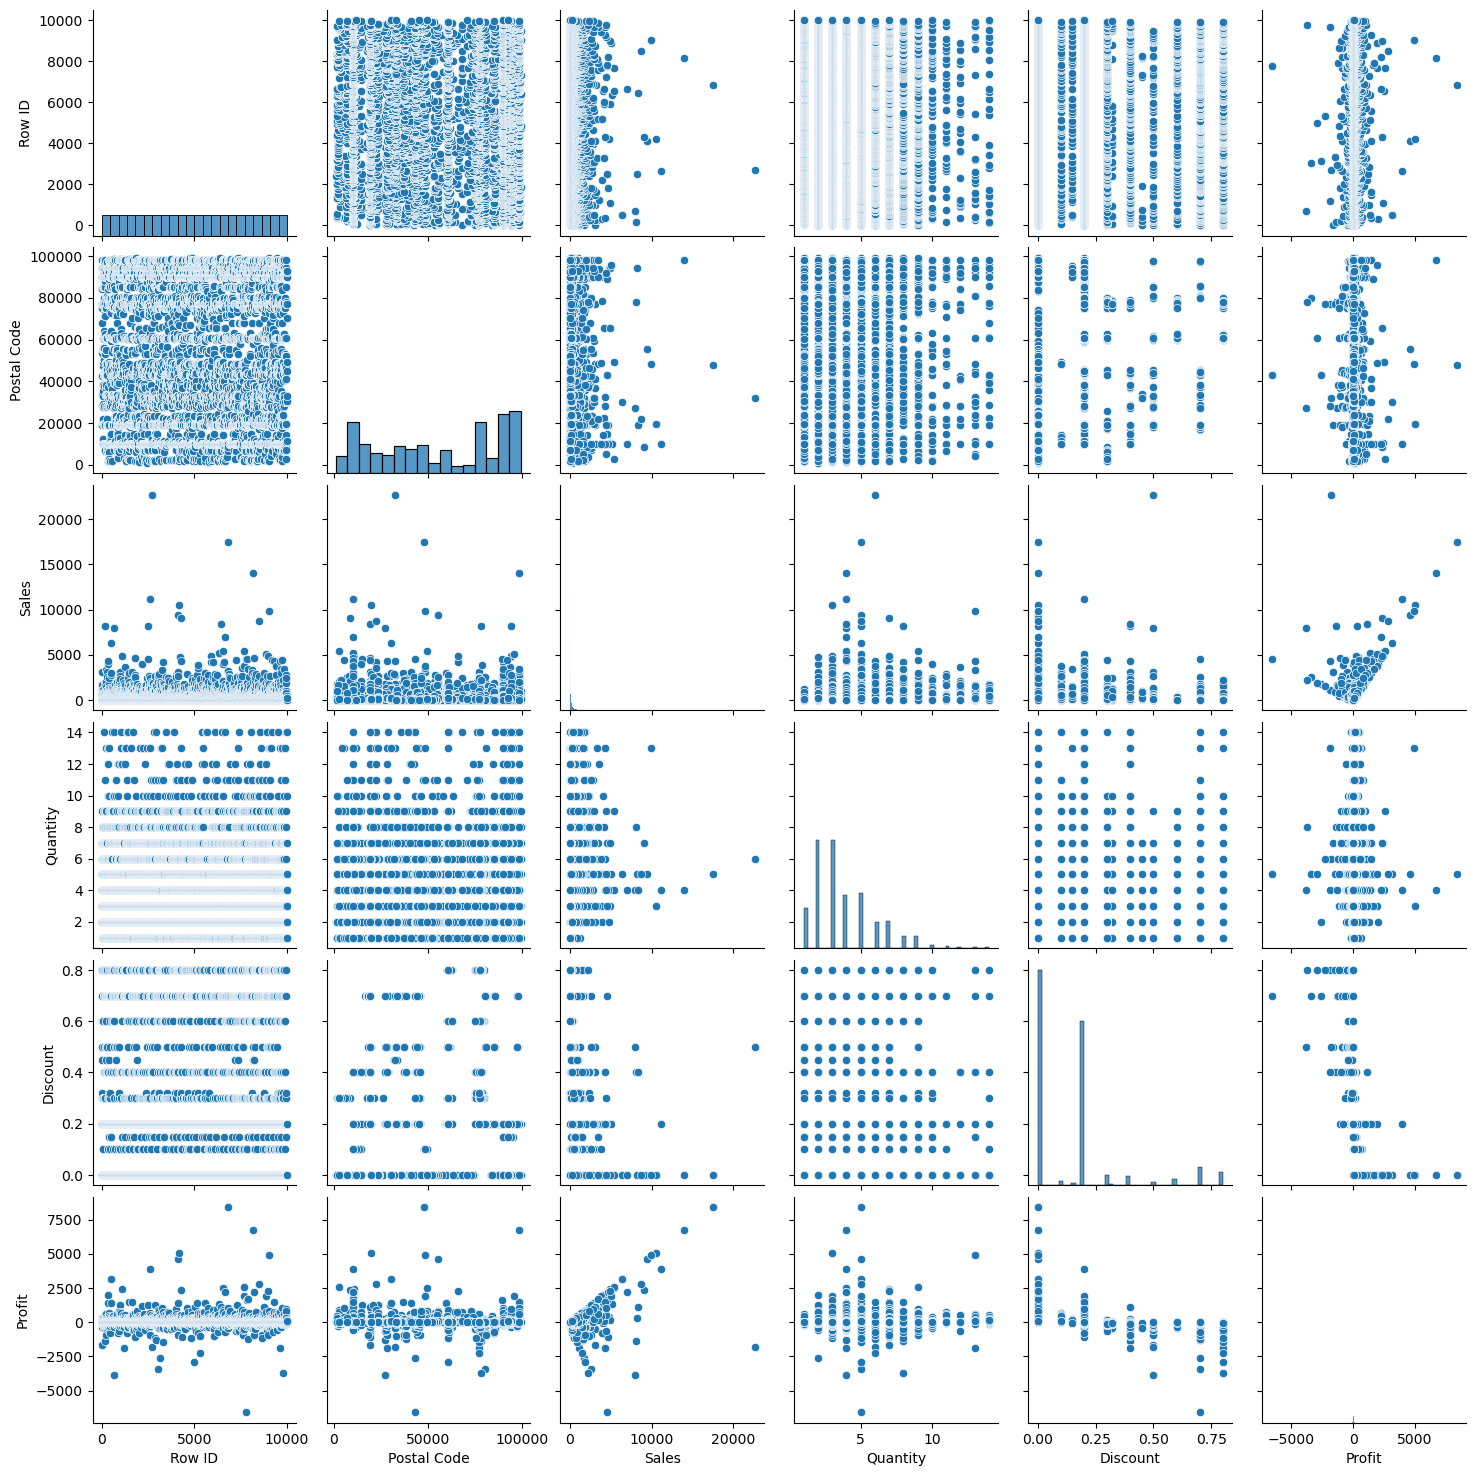

In [50]:
#Scatter plot matrix
sns.pairplot(df)
plt.show()

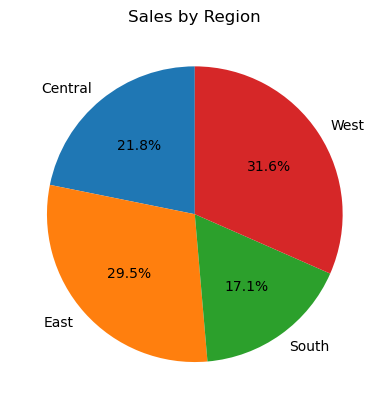

In [51]:
#Pie chart of sales by region
region_sales = df.groupby('Region')['Sales'].sum()

plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales by Region')
plt.show()

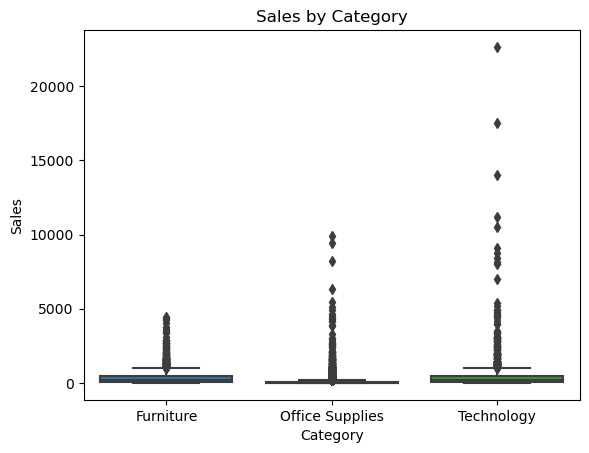

In [52]:
#Boxplot of sales by product category
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [53]:
#Choropleth map of sales by state
import plotly.express as px

state_sales = df.groupby('State')['Sales'].sum().reset_index()
fig = px.choropleth(state_sales, locations='State', locationmode='USA-states', color='Sales', scope='usa')
fig.show()

In [54]:
#Sankey diagram of sales by region, category, and sub-category
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['East', 'West', 'Central', 'South', 'Furniture', 'Office Supplies', 'Technology', 'Bookcases', 'Chairs', 'Tables', 'Phones', 'Accessories', 'Machines', 'Copiers', 'Paper', 'Binders', 'Storage', 'Furnishings', 'Supplies', 'Appliances'],
      color = ['#aec7e8', '#1f77b4', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
    ),
    link = dict(
      source = [0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 14, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19],
      target = [4, 5, 6, 18, 7, 8, 9, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 4, 5, 6, 4, 5, 6, 11, 4, 5, 4, 5, 4, 5, 8, 9, 4, 5, 12, 4, 5, 6, 4, 5, 6, 6, 13, 14, 15, 16, 16, 17, 17, 18, 19],
      value = df['Sales']
    )
)])

fig.update_layout(title_text="Sales Sankey Diagram")
fig.show()


In [55]:
#Sunburst chart of sales by region and product category
fig = px.sunburst(df, path=['Region', 'Category', 'Sub-Category'], values='Sales')
fig.show()

In [56]:
#Heat map of sales by region and product category
region_category_sales = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()
heatmap_data = pd.pivot_table(region_category_sales, values='Sales', index=['Region'], columns='Category')
fig = px.imshow(heatmap_data, labels=dict(x="Product Category", y="Region", color="Sales"), x=['Furniture', 'Office Supplies', 'Technology'], y=['Central', 'East', 'South', 'West'], color_continuous_scale='RdBu')
fig.show()


In [57]:
#3D scatter plot of sales, profit, and discount by product category
fig = px.scatter_3d(df, x='Sales', y='Profit', z='Discount', color='Category', size='Sales', labels=dict(Sales="Sales ($)", Profit="Profit ($)", Discount="Discount (%)", Category="Product Category"))
fig.show()


In [58]:
#Parallel coordinates plot of sales, profit, and discount by product category
fig = px.parallel_coordinates(df, dimensions=['Category', 'Sales', 'Profit', 'Discount'], color='Sales', labels=dict(Category="Product Category", Sales="Sales ($)", Profit="Profit ($)", Discount="Discount (%)"))
fig.show()

In [59]:
#Treemap of sales by product category and sub-category
fig = px.treemap(df, path=['Category', 'Sub-Category'], values='Sales')
fig.show()


In [60]:
#Funnel chart of sales by region and product category
fig = px.funnel(df, x='Sales', y='Category', color='Region', labels=dict(Sales="Sales ($)", Category="Product Category", Region="Region"))
fig.show()
